# Insper - Ciência dos Dados 2022.2

## Engenharia - 2ºB

### Integrantes do grupo:

* Beatriz Rodrigues de Freitas

* Carlos Eduardo Porciuncula Yamada

* Verônica Luisa Ribeiro Lima

___
<div id='sumario'></div>

## Sumário

1. [Introdução](#intro)

2. [Minerando Dados e Características do Dataset](#data-mining)

3. [Modelos de Predição](#prediction)

4. [Processo e Estatísticas de Validação](#validation)

5. [Conclusão](#conclusion)

6. [Referências Bibliográficas](#ref)

___
<div id='intro'></div>

## 1. Introdução

### Objetivo

(Objetivo escolhido para trabalhar neste projeto)

### Descrição da base de dados

* `age`: idade do paciente (anos);

* `anaemia`: **booleano** → 0, se o paciente não tem anemia; 1, se o paciente tem anemia;

* `high blood pressure`: **booleano** → 0, se o paciente não tem hipertensão; 1, se o paciente tem hipertensão;

* `creatinine phosphokinase` (*CPK*): concentração da enzima CPK no sangue (mcg/L);

* `diabetes`: **booleano** → 0, se o paciente não possui; 1, se o paciente possui;

* `ejection fraction`: porcentagem do sangue que sai do coração a cada contração (porcentagem, %);

* `platelets`: plaquetas no sangue (kiloplaquetas/mL);

* `sex`: **booleano** → 0, se mulher; 1, se homem;

* `serum creatinine`: concentração de creatinina sérica no sangue (mg/dL);

* `serum sodium`: concentração de sódio sérico no sangue (mEq/L);

* `smoking`: **booleano** → 0, se o paciente não fuma; 1, se o paciente fuma;

* `time`: tempo de acompanhamento (dias);

* `death event` (*target*): **booleano** → 0, o evento não ocorre; 1, o evento não ocorre;



In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import os
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop_price = pd.read_csv('dados/laptop_price.csv',sep=',',  encoding='latin-1')
laptop_price.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [3]:
dados = laptop_price.loc[:, ['Company', 'TypeName', 'Cpu', "Inches", 'Ram', 'Memory', 'Gpu', 'Price_euros']]

dados.insert(3, 'Processor', '')

In [4]:
tamanho = len(dados['Company'])

for i in range(0, tamanho):
    cpu = dados["Cpu"][i]

    if re.search("AMD", cpu):
        dados.loc[i,'Processor']= 'AMD'
    elif re.search("Intel Pentium", cpu):
        dados.loc[i,'Processor']= 'Intel Pentium'
    elif re.search("Intel Core i3", cpu):
        dados.loc[i,'Processor']= 'Intel Core i3'
    elif re.search("Intel Core i5", cpu):
        dados.loc[i,'Processor']= 'Intel Core i5'
    elif re.search("Intel Core i7", cpu):
        dados.loc[i,'Processor']= 'Intel Core i7'
    elif re.search("Intel Celeron", cpu):
        dados.loc[i,'Processor']= 'Intel Celeron'
    else:
        dados.loc[i,'Processor']= 'Outros'

In [5]:
dados.drop(columns = 'Cpu', axis = 1, inplace=True)
dados.head(3)

,Company,TypeName,Processor,Inches,Ram,Memory,Gpu,Price_euros
0,Apple,Ultrabook,Intel Core i5,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,1339.69
1,Apple,Ultrabook,Intel Core i5,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,898.94
2,HP,Notebook,Intel Core i5,15.6,8GB,256GB SSD,Intel HD Graphics 620,575.00


[Voltar para o sumário](#sumario)

___
<div id='data-mining'></div>

## 2. Minerando Dados e Características do Dataset

* Se necessário, faça filtro na base de dados tanto de linhas como de colunas em prol do
objetivo traçado anteriormente.

* Descreva as variáveis finais.

* Faça análise descritiva detalhada das variáveis, norteado pelo objetivo do problema. Aqui, é
interessante entender como sua variável *target* (y) se comporta cruzada com cada *feature* (x). Ferramentas estatísticas: medidas de associação, gráfico de dispersão, entre outras.

* *Storytelling* com dados: explicação do raciocínio.

* Link do <a href='https://vimeo.com/114900089'>vídeo</a> sobre Teoria das Cores para ajudar no *storytelling*.




## 2.1 Análise exploratória


### 2.1 Disposição dos preços

Entendendo como o preço varia na base de dados

In [6]:
dados['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

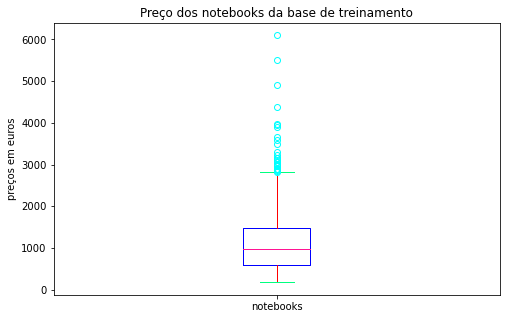

In [7]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.boxplot(dados['Price_euros'], labels = ['notebooks'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Preço dos notebooks da base de treinamento')
plt.ylabel('preços em euros')

plt.show()

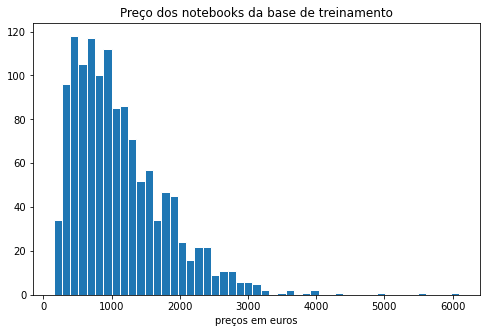

In [8]:
faixas = np.linspace(150, 6100, 50)

plt.figure(figsize=(8,5))

plt.subplot(111)
plt.hist(dados['Price_euros'], bins = faixas, edgecolor='white')
plt.xlabel('preços em euros')
plt.title("Preço dos notebooks da base de treinamento")
plt.show()

Apesar de ter muitos "outliers" no gráfico, manteremos a maioria para a análise, pois era esperado que haja uma grande diferença de preço entre diferentes categorias de notebooks e como estamos analisando várias categorias é provável que os preços mais altos sejam de uma categoria específica. Dessa forma a qualidade da previsão do código seria afetada para determinadas categorias caso todos "outliers" não fossem desconsiderados no treinamento.


Entretanto, limitaremos o preço máximo a 4000 euros para melhorar a qualidade geral da previsão, pois é um valor que engloba até as categorias com maiores preços.

In [57]:
dados = dados.loc[dados['Price_euros'] <= 4000, :]

### 2.2 Comparação das variáveis

In [11]:
precos_por_marca = dados.sort_values(['Company'])
precos_por_marca.head()

,Company,TypeName,Processor,Inches,Ram,Memory,Gpu,Price_euros
651,Acer,Gaming,Intel Core i5,15.6,8GB,1TB HDD,Nvidia GeForce GTX 1050,709.0
78,Acer,Notebook,Intel Core i3,15.6,4GB,1TB HDD,Nvidia GeForce MX130,530.0
324,Acer,Notebook,AMD,15.6,8GB,256GB SSD,AMD Radeon RX 540,659.0
326,Acer,Notebook,Intel Core i5,15.6,6GB,1TB HDD,Intel HD Graphics 620,549.0
371,Acer,Notebook,AMD,15.6,4GB,128GB SSD,AMD Radeon R5,426.0


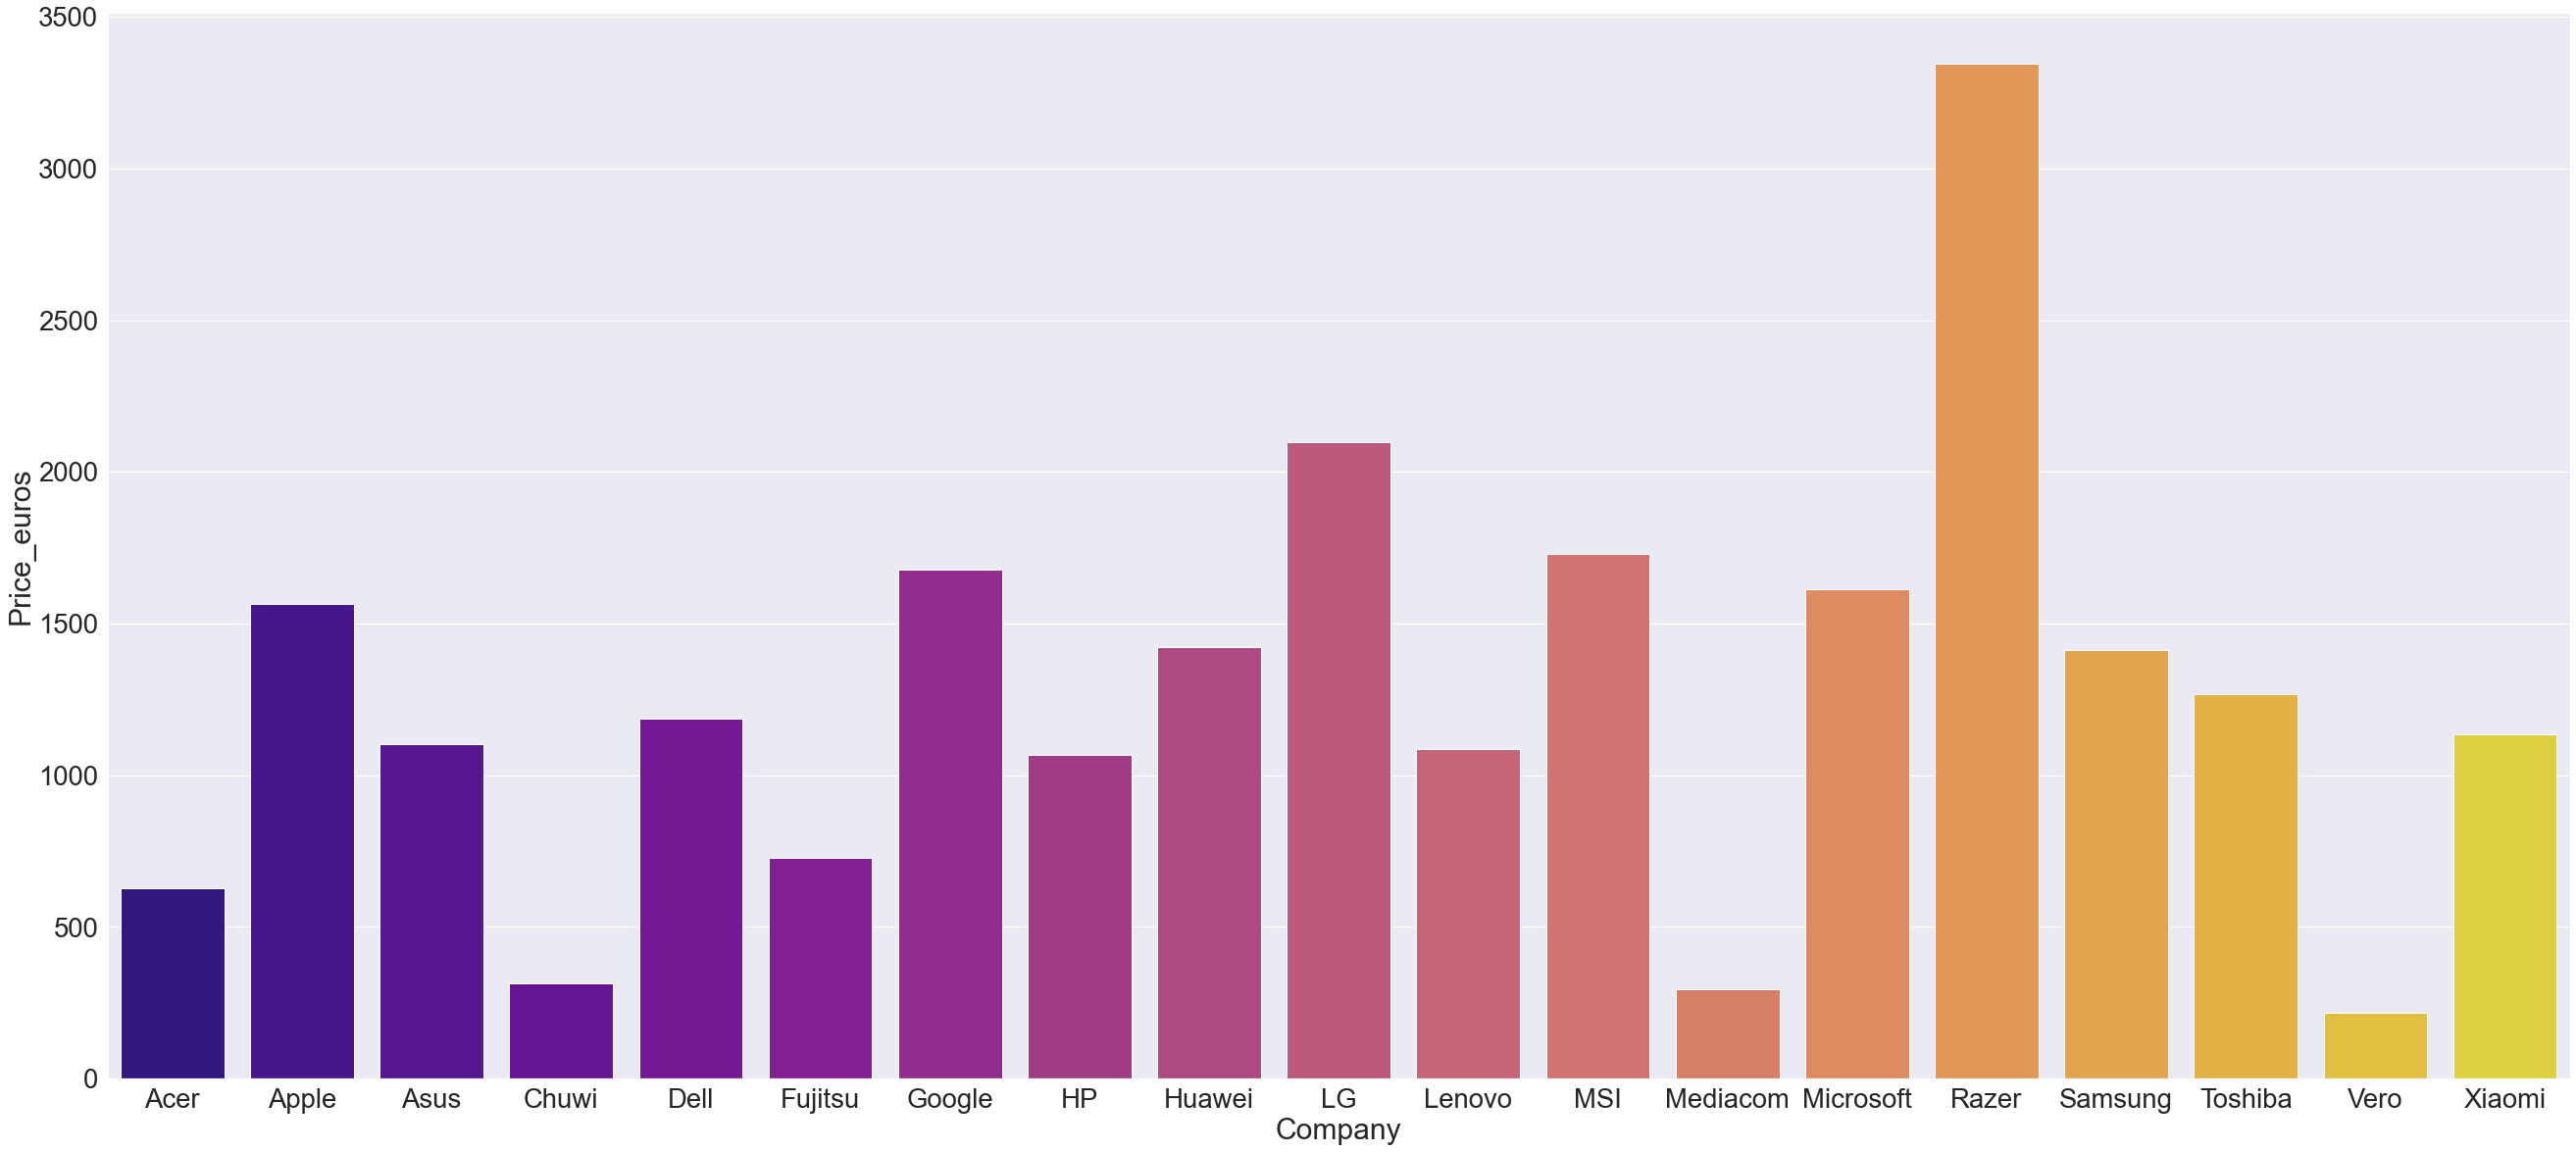

In [31]:
precos_por_marca = dados.groupby('Company')['Price_euros'].mean().reset_index()

plt.figure(figsize = (45,20))
sns.set(font_scale = 2.5)
ax = sns.barplot(x='Company', y='Price_euros', data= precos_por_marca,order = precos_por_marca['Company'], palette = 'plasma')

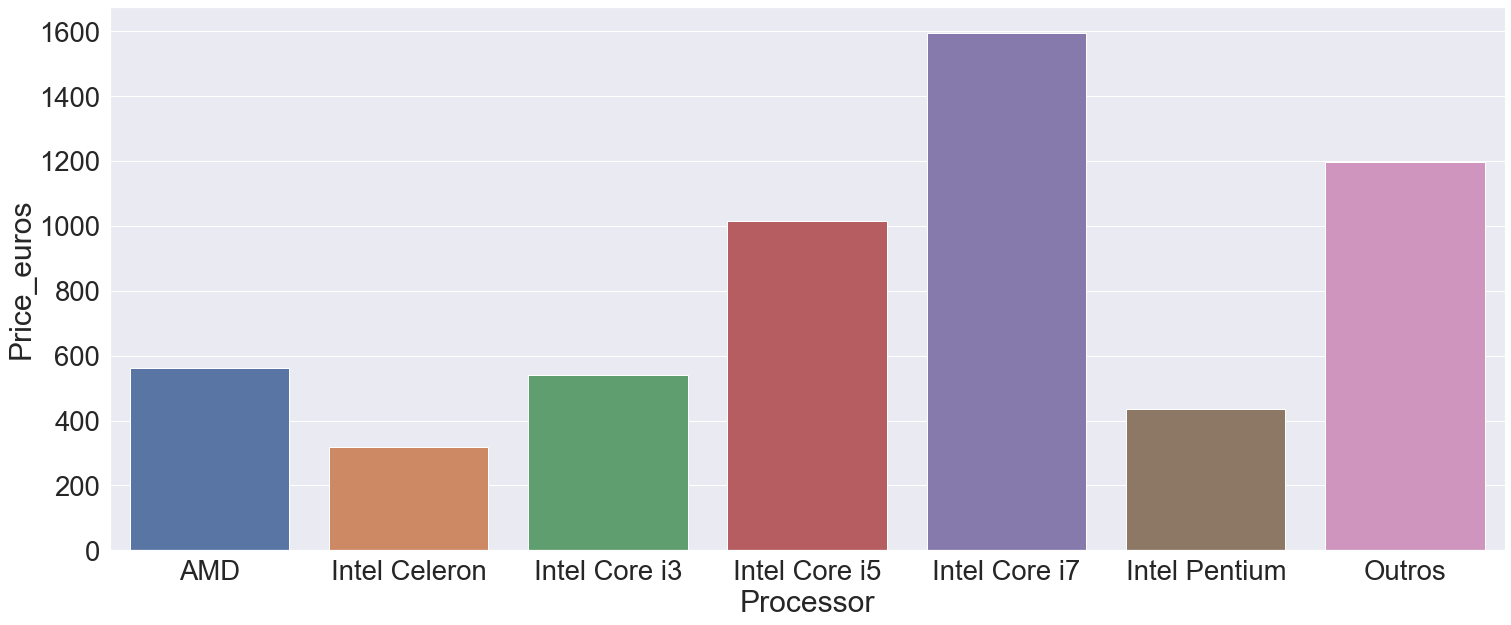

In [49]:
precos_por_processador = dados.groupby('Processor')['Price_euros'].mean().reset_index()

plt.figure(figsize = (25,10))
sns.set(font_scale = 2.5)
ax = sns.barplot(x='Processor', y='Price_euros', data= precos_por_processador,order = precos_por_processador['Processor'])

In [50]:
precos_por_processador

,Processor,Price_euros
0,AMD,560.638871
1,Intel Celeron,319.328523
2,Intel Core i3,541.625956
3,Intel Core i5,1015.015248
4,Intel Core i7,1595.779108
5,Intel Pentium,435.540000
6,Outros,1195.925946


[Voltar para o sumário](#sumario)

___
<div id='prediction'></div>

## 3. Modelos de Predição

Descrever e justificar pelo menos **DUAS** técnicas de predição.

[Voltar para o sumário](#sumario)

___
<div id='validation'></div>

## 4. Processo e Estatísticas de validação

Calcular medidas que informam a performance de cada modelo ajustado. Para cada um:

* Dividir a base de dados em **Treinamento** e **Teste**. Usar **Treinamento** para estimar cada modelo.

* Estudar medidas que validam os modelos.

    Exemplos:

    * <a href='https://help.salesforce.com/s/articleView?id=sf.bi_edd_model_metrics_cross_validation_measure.htm&type=5'>Cross Validation Tab for Numeric Use Cases</a>

    * <a href='https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b'>Como saber se seu modelo de Machine Learning está funcionando mesmo</a>

    * <a href='https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/'>Modelos Preditivos de Notas de Redação do ENEM 2015</a>

* Discutir sobre overfitting e underfitting (<a href='https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/'>link</a>)

* **Extra**: Faça o processo de Validação Cruzada utilizando também 10 ciclos e calcule a performance média e desvio padrão das duas medidas R2 e RMS tanto para a parte treinamento como para a parte teste. Discuta com riqueza de detalhes.

[Voltar para o sumário](#sumario)

___
<div id='conclusion'></div>

## 5. Conclusão

[Voltar para o sumário](#sumario)

___
<div id='ref'></div>

## 6. Referências Bibliográficas

[Voltar para o sumário](#sumario)